# Cleaning_Numerical_Data

## Q1. Importing necessary libraries.

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Q2.Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df


In [113]:
customer_df = pd.read_csv('/Users/ayeesha/IH-Labs/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

### Q3. First look at its main features (head, shape, info).

In [114]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [115]:
customer_df.shape

(9134, 24)

In [116]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Q4.Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [117]:
cols = []
for column in customer_df.columns:
    cols.append(column.lower())
customer_df.columns = cols

customer_df.columns = customer_df.columns.str.replace(' ', '_')

display(customer_df.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Q5.Change effective to date column to datetime format.

In [118]:

# convert the 'Date' column to datetime format
customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')
 
# Check the format of 'Date' column
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

### Q6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df


In [119]:
col = []
numerical_cols = customer_df.select_dtypes(np.number)
for col in numerical_cols.columns:
    print(col, ': ',numerical_cols[col].nunique())

customer_lifetime_value :  8041
income :  5694
monthly_premium_auto :  202
months_since_last_claim :  36
months_since_policy_inception :  100
number_of_open_complaints :  6
number_of_policies :  9
total_claim_amount :  5106


In [120]:
#print(customer_df['months_since_last_claim'].value_counts())

In [121]:
#customer_df['customer_lifetime_value'].unique()

#customer_df['customer_lifetime_value'].nunique()

#print(customer_df['monthly_premium_auto'].value_counts())

def extract_cv_dv(df):
    cv = []
    dv = []
    threshold = round(df.shape[0]*0.01) # 1 percent of Total number of rows.
    #print(threshold)
    for col in df.select_dtypes(np.number).columns:
        if(df[col].nunique() > threshold):
            cv.append(col)
        else:
            dv.append(col)
    return cv, dv

continuous_df, discrete_df = extract_cv_dv(customer_df)
continuous_df = customer_df[continuous_df]
display(continous_df)

discrete_df = customer_df[discrete_df]
display(discrete_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


### Q7.Plot a correlation matrix, comment what you see.

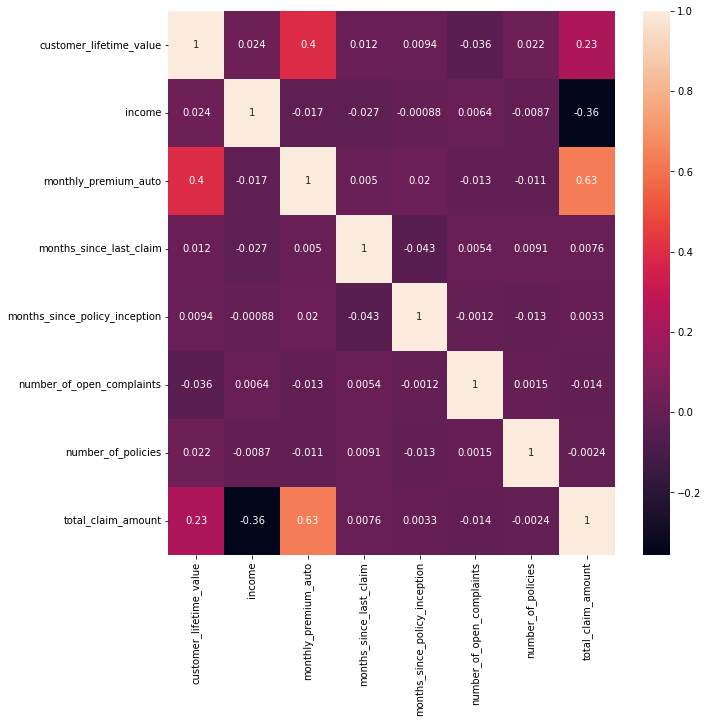

In [122]:

fig, ax = plt.subplots(figsize=(10,10))
correlations = numerical_cols.corr()
sns.heatmap(correlations, annot=True)
plt.show()

#### Obersvations on correlation matrix

- 'total_claim_amount' and 'monthly_premium_auto' is highly correlated (0.63).
- 'total_claim_amount' and 'income' has  negative correlation (-0.36).
- 'customer_lifetime_value' and 'total_claim_amount'is also correlated (0.23).
- 'customer_lifetime_value' and 'monthly_premium_auto'is also correlated (0.4).

- There is no multi-colinearity between the features.

### Q8.Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

### plotting discrete variables

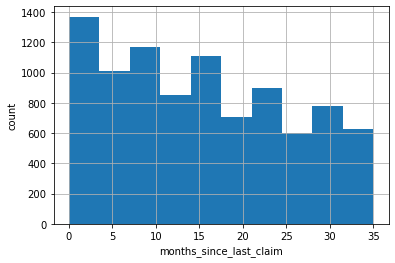

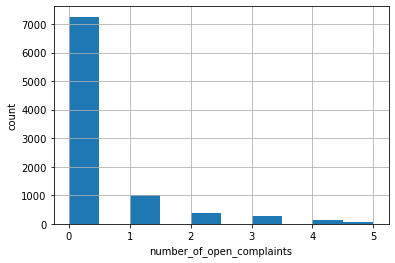

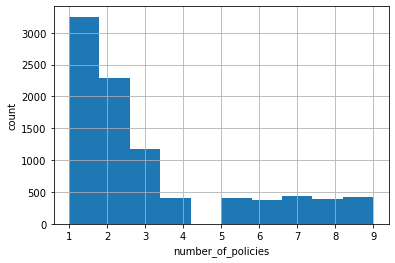

In [123]:
def plot_discrete_variables(discrete_df):
    for col in discrete_df.columns:
        plt.hist(discrete_df[col], label=col)
        plt.xlabel(col)
        plt.ylabel('count')
        plt.grid(True)
        plt.show()
   
plot_discrete_variables(discrete_df)

- 'months_since_last_claim' data is distributed evenly across the bins.
- 'number_of_openComplains' has more data in bin '0'.
- 'number_of_policies' may be there is a NaN values between the bin 4 and 5.

###  plotting continuous_variables

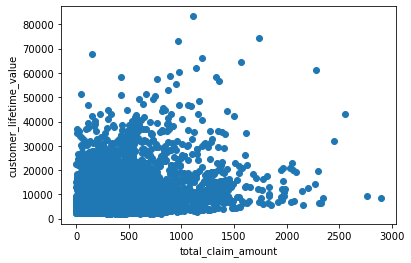

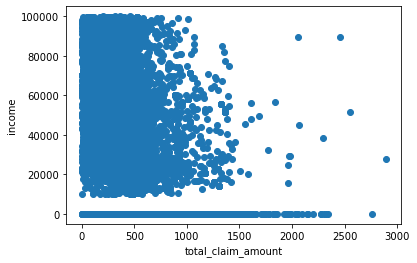

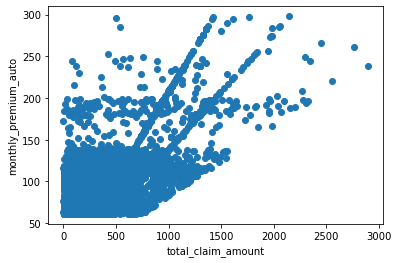

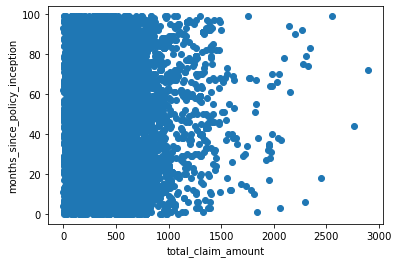

In [124]:

def plot_scatter(df, x, y):
    plt.scatter(x = df[x], y = df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
plot_scatter(continuous_df, 'total_claim_amount', 'customer_lifetime_value')
plot_scatter(continuous_df, 'total_claim_amount', 'income')
plot_scatter(continuous_df, 'total_claim_amount', 'monthly_premium_auto')
plot_scatter(continuous_df, 'total_claim_amount', 'months_since_policy_inception')


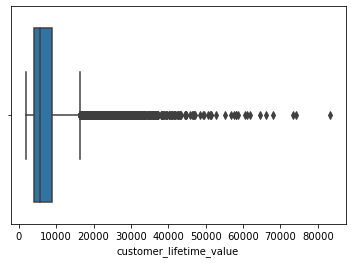

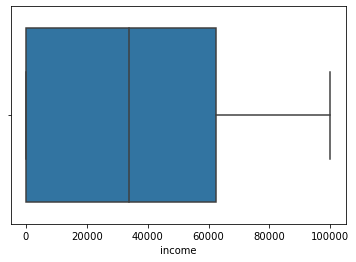

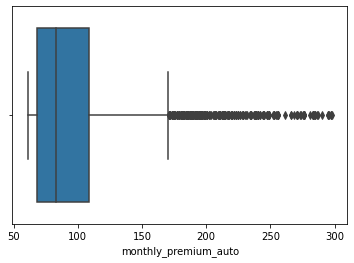

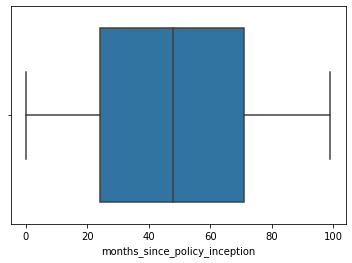

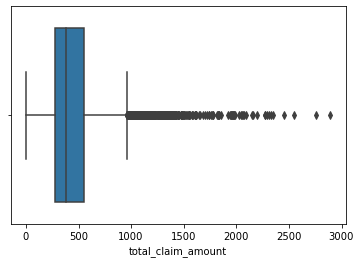

In [128]:
def plot_continuous_variables(continuous_df):
    for col in continuous_df.columns:
        sns.boxplot(x=continuous_df[col])
        plt.show()
   
plot_continuous_variables(continuous_df)

- i can see that there are outliers in the data. Apart from that i dont know how to look in another angel.

### Q 10.Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)


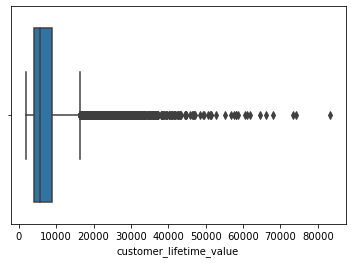

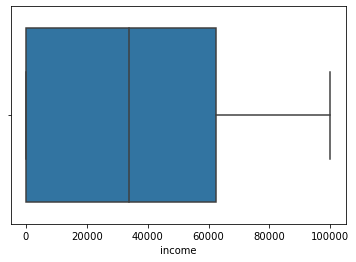

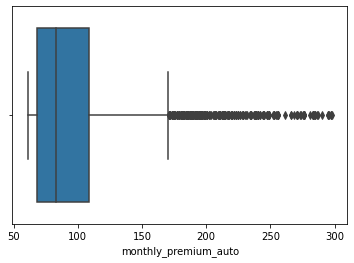

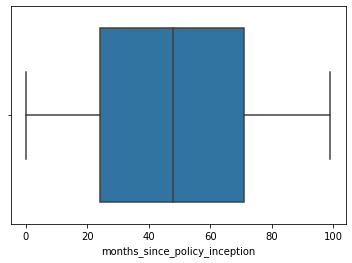

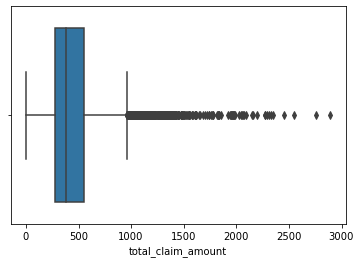

In [129]:
def plot_continuous_variables(continuous_df):
    for col in continuous_df.columns:
        sns.boxplot(x=continuous_df[col])
        plt.show()
   
plot_continuous_variables(continuous_df)

### Q 11. Did you find outliers? Comment what you will do with them.

- yes i found outliers in 'customer_lifetime_value','monthly_premium_auto' and 'total_claim_amount'.
- we can drop those outliers but we will loose those data, so i think the better option is to overwrite the outliers with the upperlimit(75th percentile + 1.5 * iqr) .


### Q12.Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [130]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

- There are no NaN values in the dataframe .